In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/home/coder/gretel'

In [2]:
from src.evaluation.evaluator_manager import EvaluatorManager

config_file_path = module_path + '/examples/config/config_tree-cycles_tree-cycles-custom-oracle_countergan.json'
output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/countergan_fit_on_tree-cycles_instances-100_nodes_per_inst-28_nodes_in_cycles-7_fold_id_0/results_run-0.json'
output_folder = module_path + '/examples/output/'
stats_folder = module_path + '/examples/stats/'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(True, True, True, True)

### Executing the pipeline

In [3]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:173: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 34: CUDA driver is a stub library (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Iteration [0/50] [0]	Loss_D: 1.2897300720214844	Loss_G: 1.7327033281326294	D(x): 0.5240543484687805	D(G(z)): 0.5254132151603699 / 0.5193920135498047
Iteration [0/50] [1]	Loss_D: 1.4026679992675781	Loss_G: 1.7410205602645874	D(x): 0.520507276058197	D(G(z)): 0.5129168629646301 / 0.5233727693557739
Iteration [0/50] [2]	Loss_D: 1.4433324337005615	Loss_G: 1.7278004884719849	D(x): 0.5418254733085632	D(G(z)): 0.5153920650482178 / 0.517029881477356
Iteration [0/50] [3]	Loss_D: 1.432922601699829	Loss_G: 1.7280020713806152	D(x): 0.5280196070671082	D(G(z)): 0.505551815032959 / 0.5171272158622742
Iteration [0/50] [4]	Loss_D: 1.3536425828933716	Loss_G: 1.736711859703064	D(x): 0.5147466659545898	D(G(z)): 0.532294511795044 / 0.5213146805763245
Iteration [0/50] [5]	Loss_D: 1.2936294078826904	Loss_G: 1.7399271726608276	D(x): 0.5269030928611755	D(G(z)): 0.5205388069152832 / 0.5228513479232788
Iteration [0/50] [6]	Loss_D: 1.4293773174285889	Loss_G: 1.7480406761169434	D(x): 0.5238834023475647	D(G(z)): 0.5

### Reading the json with the results

In [4]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 100, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "countergan", "parameters": {"n_nodes": 28, "batch_size_ratio": 0.1, "device": "cpu", "training_iterations": 50, "real_label": 1, "fake_label": 0, "fold_id": 0}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [1120.1692447662354, 0.007753610610961914, 0.008526086807250977, 0.007210254669189453, 0.007455587387084961, 0.006920337677001953, 0.008034229278564453, 0.007711648941040039, 0.009424924850463867, 0.010678529739379883, 0.008104085922241211, 0.007741212844848633, 0.007749795913696289, 0.007653951644897461, 0.0063610076904296875, 0.0077931880

In [5]:
from src.data_analysis.data_analyzer import DataAnalyzer
import pandas as pd

dtan = DataAnalyzer(output_folder, stats_folder)
dtan.aggregate_data()
dtan.aggregate_runs()
dtan.create_tables_by_oracle_dataset()

results_table = pd.read_csv(stats_folder + 'tree-cycles-tree_cycles_custom_oracle.csv')
results_table

,Unnamed: 0,explainer,runtime,runtime-std,Graph_Edit_Distance,Graph_Edit_Distance-std,Oracle_Calls,Oracle_Calls-std,Correctness,Correctness-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Oracle_Accuracy,Oracle_Accuracy-std
0,0,countergan,11.209515,0.0,49.22,0.0,91.0,0.0,0.0,0.0,0.887693,0.0,0.0,0.0,1.0,0.0


In [18]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]
# Obtain the for each data instance its counterfactual explanation
inst_exp_list = ev.get_instance_explanation_pairs()
# Take the first pair instance-explanation as an example
inst, exp = inst_exp_list[1]

In [19]:
# Printing the steps needed to obtain the counterfactual
cf_actions = dtan.get_counterfactual_actions(inst, exp)
for act, el in cf_actions.items():
    print(act, el)

Remove Nodes []
Remove Edges [(22, 2), (13, 27), (21, 10), (3, 7), (3, 16), (5, 13), (8, 15), (2, 14), (1, 12), (22, 4), (6, 20), (5, 9), (5, 21), (17, 20), (27, 24), (11, 19), (0, 22), (15, 10), (1, 23), (24, 25), (20, 18), (23, 8), (12, 20), (0, 3)]
Add Nodes []
Add Edges [(3, 4), (12, 13), (21, 22), (0, 2), (23, 25), (17, 24), (1, 9), (11, 17), (15, 20), (18, 19), (12, 15), (5, 18), (0, 1), (23, 27), (10, 11), (2, 10), (1, 8), (6, 7), (12, 14), (3, 5), (14, 23), (17, 22), (2, 6), (16, 17)]


Original Instance

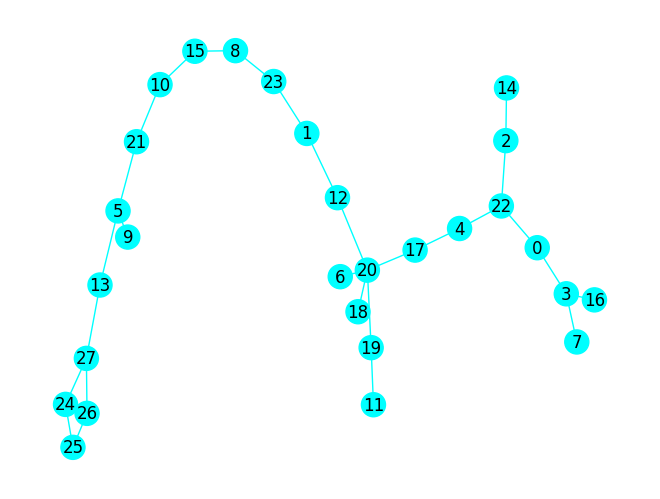

In [20]:
dtan.draw_graph(inst, layout='spring')

Counterfactual

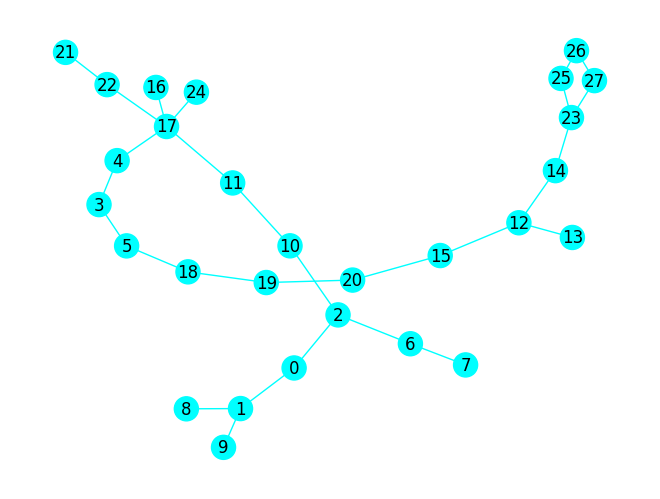

In [21]:
dtan.draw_graph(exp, layout='spring')

Difference between the original instance and the counterfactual

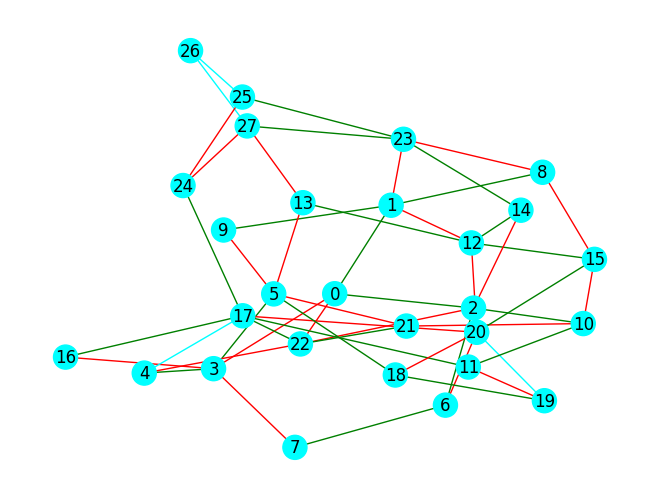

In [22]:
dtan.draw_counterfactual_actions(inst, exp, layout='spring')

In [14]:
exp._np_array

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [16]:
len(exp.graph.edges)

27

In [17]:
ev.get_instance_and_counterfactual_classifications()

[{'instance_id': 0,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 1,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 2,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 3,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 4,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 5,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 6,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 7,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 8,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 9,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
